<a href="https://colab.research.google.com/github/Neethu-Sachu/python_world/blob/main/Business_Case_Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The raw business data of Delhivery company is given. We need to
* Identify the relevant data attributes
* Extract new features from the given raw fields
* Find the relationship between features
* Identify the missing data and outliers and modify the data to handle it
* Do Column Normalization /Column Standardization of numerical data

# Exploratory Data Analysis

In [ ]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery_data.csv

--2023-04-07 05:47:00--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M  39.8MB/s    in 1.3s    

2023-04-07 05:47:02 (39.8 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [ ]:
df=pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Shape of the dataset -
print("No. of rows : ", df.shape[0])
print("No. of columns : ", df.shape[1])

No. of rows :  144867
No. of columns :  24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Initial Observation
* 24 attributes with 144867 rows
* catagorical data
    1. data                       
    2. trip_creation_time              
    3. route_schedule_uuid             
    4. route_type                      
    5. trip_uuid                       
    6. source_center                   
    7. source_name                     
    8. destination_center              
    9. destination_name    
    10. od_start_time                  
    11. od_end_time  

* Numerical data                 
    1. start_scan_to_end_scan  
    2. actual_distance_to_destination
    3. actual_time                     
    4. osrm_time                       
    5. osrm_distance                   
    6. segment_actual_time             
    7. segment_osrm_time               
    8. segment_osrm_distance           
  
* Unknown field     - removed from the dataset
    1. is_cutoff                       
    2. cutoff_factor                   
    3. cutoff_timestamp   
    4. factor
    5. segment_factor      

In [ ]:
#droping unknown fields
dfn = df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor','segment_factor'])

In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [ ]:
# Checking for null values -
(dfn.isna().sum() / len(df)) * 100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.203027
destination_center                0.000000
destination_name                  0.180853
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

In [ ]:
# Checking for null values -
dfn.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [ ]:
print(dfn[dfn.isnull().any(axis=1)])

            data          trip_creation_time  \
110     training  2018-09-25 08:53:04.377810   
111     training  2018-09-25 08:53:04.377810   
112     training  2018-09-25 08:53:04.377810   
113     training  2018-09-25 08:53:04.377810   
114     training  2018-09-25 08:53:04.377810   
...          ...                         ...   
144484      test  2018-10-03 09:06:06.690094   
144485      test  2018-10-03 09:06:06.690094   
144486      test  2018-10-03 09:06:06.690094   
144487      test  2018-10-03 09:06:06.690094   
144488      test  2018-10-03 09:06:06.690094   

                                      route_schedule_uuid route_type  \
110     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
112     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...      

In [ ]:
dfn.iloc[111:129,:]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,34.657709,110.0,43.0,41.5361,52.0,10.0,10.6517
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.149642,156.0,73.0,101.2556,28.0,14.0,20.7746
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.691981,212.0,92.0,127.9860,55.0,18.0,26.7304
117,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,132.128898,266.0,117.0,156.5566,54.0,25.0,28.5706
118,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,154.305625,314.0,138.0,186.5238,47.0,21.0,29.9673
119,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,178.611991,350.0,161.0,218.2945,35.0,22.0,31.7707
120,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,199.353179,391.0,176.0,234.8976,41.0,20.0,22.9423


In [ ]:
dfn[dfn["source_center"]=="IND342902A1B"]
#90 rows is having null value for source_name column. So we can drop null or missing values

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.149642,156.0,73.0,101.2556,28.0,14.0,20.7746
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.691981,212.0,92.0,127.9860,55.0,18.0,26.7304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102433,test,2018-10-02 09:03:43.743009,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153847102374259925,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-03 06:26:15.394809,2018-10-03 15:46:32.148116,560.0,132.590047,279.0,119.0,160.7385,60.0,29.0,34.2473
102434,test,2018-10-02 09:03:43.743009,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153847102374259925,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-03 06:26:15.394809,2018-10-03 15:46:32.148116,560.0,155.235386,311.0,138.0,187.3637,32.0,18.0,26.6252
102435,test,2018-10-02 09:03:43.743009,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153847102374259925,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-03 06:26:15.394809,2018-10-03 15:46:32.148116,560.0,176.361211,341.0,157.0,211.0723,30.0,19.0,23.7085
102436,test,2018-10-02 09:03:43.743009,thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...,FTL,trip-153847102374259925,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-03 06:26:15.394809,2018-10-03 15:46:32.148116,560.0,199.187091,378.0,175.0,234.5741,36.0,26.0,26.6927


In [ ]:
dfn[dfn["source_center"]=="IND342902A1B"]["source_name"].value_counts()
#Source name for source ID "IND342902A1B" is missing and its for all the 90 rows
# So the missing value rows are droping off from the dataset

Series([], Name: source_name, dtype: int64)

In [ ]:
dfn.dropna(inplace=True)
# As there are only few missing values

In [ ]:
dfn.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [ ]:
dfn.shape
#144867

(144316, 19)

In [ ]:
(144867 - 144316)/144867*100
#0.38% drop in the number of rows

0.380348871723719

In [ ]:
dfn.describe(include="all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
unique,2,14787,1497,2,14787,1496,1496,1466,1466,26223,26223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-10-01 05:04:55.268931,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104632,101,1812,99132,101,23267,23267,15192,15192,81,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325


In [ ]:
dfn.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


In [ ]:
def dist_check(dfn, col_name):
  print("Unique values : ", dfn[col_name].unique())
  print("Value counts : ")
  print(dfn[col_name].value_counts())

In [ ]:
cat_cols = dfn.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = dfn.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

In [ ]:
cat_cols

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time']

In [ ]:
for col in cat_cols:
  print(col, " -")
  print(dfn[col].value_counts())
  print("\n")

data  -
training    104632
test         39684
Name: data, dtype: int64


trip_creation_time  -
2018-10-01 05:04:55.268931    101
2018-09-17 04:43:09.467353    101
2018-09-28 05:23:15.359220    101
2018-10-03 05:04:14.929361    101
2018-09-27 04:47:19.425867    101
                             ... 
2018-09-17 01:26:45.903862      1
2018-09-19 06:09:03.938546      1
2018-10-03 18:45:56.568239      1
2018-10-03 23:47:01.484016      1
2018-10-03 22:22:54.493221      1
Name: trip_creation_time, Length: 14787, dtype: int64


route_schedule_uuid  -
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:c6403e98-1ffa-49ed-bc55-5adcdc4ad39d       1
thanos::sroute:889b9cf5-da6a-48c

In [ ]:
for col in num_cols:
  print(col, " -")
  print(dfn[col].value_counts())
  print("\n")

start_scan_to_end_scan  -
110.0     459
72.0      424
99.0      411
95.0      405
86.0      399
         ... 
1416.0      1
2706.0      1
1166.0      1
905.0       1
1393.0      1
Name: start_scan_to_end_scan, Length: 1914, dtype: int64


actual_distance_to_destination  -
101.686163    2
195.557906    2
36.363981     2
44.028408     2
22.008557     2
             ..
133.290112    1
110.211456    1
88.932883     1
66.366710     1
70.039010     1
Name: actual_distance_to_destination, Length: 143965, dtype: int64


actual_time  -
32.0      1440
36.0      1413
30.0      1345
38.0      1322
42.0      1236
          ... 
3162.0       1
3055.0       1
2658.0       1
2914.0       1
2980.0       1
Name: actual_time, Length: 3182, dtype: int64


osrm_time  -
21.0      2392
20.0      2354
18.0      2245
22.0      2133
17.0      2089
          ... 
1560.0       1
1614.0       1
1130.0       1
1250.0       1
1312.0       1
Name: osrm_time, Length: 1531, dtype: int64


osrm_distance  -
48.0394     1

# categorical data
## data  
* training    104858
* test         40009

## route_type  
* FTL        99660
* Carting    45207

## droping missing values

## data  

* training    104632
* test         39684

## route_type  -
* FTL        99132
* Carting    45184



# Observation after removing missing data and unknown fields
* 24 attributes with 144316 rows
* catagorical data
    1. data - 2 unique values
      * training    (104632)
      * test         (39684)                      
    2. trip_creation_time - 14787 unique values
      * 2018-10-01 05:04:55.268931 with highest frequency of 101      
    3. route_schedule_uuid   - 1497
      * thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    (1812 times repeated)       
    4. route_type   - 2 unique values
      * FTL       (99132)
      * Carting    (45184)                 
    5. trip_uuid    - 14787 unique values (similar to trip_creation_time)
      * trip-153837029526866991 with highest frequency of 101                   
    6. source_center     - 1496 unique values
      * IND000000ACB    (23267 times repeated)                  
    7. source_name      - 1496 unique values           
      * Gurgaon_Bilaspur_HB (Haryana)    (23267 times repeated)
    8. destination_center   - 1466 unique values  
      * IND000000ACB    (15192 times repeated)       
    9. destination_name    - 1466 unique values  
      * Gurgaon_Bilaspur_HB (Haryana)        (15192 times repeated)  
    10. od_start_time      - 26223 unique values
      * 2018-09-21 18:37:09.322207    (81 times repeated)        
    11. od_end_time  - 26223 unique values
      * 2018-09-24 09:59:15.691618    (81 times repeated)

* Numerical data                 
    1. start_scan_to_end_scan - 1914 unique values
       * 110.0     (459 times repeated)  
    2. actual_distance_to_destination - 143965 unique values
      * 101.686163 repeeated 2 times
    3. actual_time - 3182 unique values
      * "32.0" - repeated 1440 times                    
    4. osrm_time  - 1531 unique values
      * "21.0" repeated 2392 times                     
    5. osrm_distance - 137544 unique values
      * 48.0394 repeated 11 times                 
    6. segment_actual_time - 746 unique values
      * 24.0 repeated 6165 times            
    7. segment_osrm_time - 214 unique values
      * 16.0 repeated 11429 times           
    8. segment_osrm_distance - 113497 unique values
      * 0.0000     1531        
    

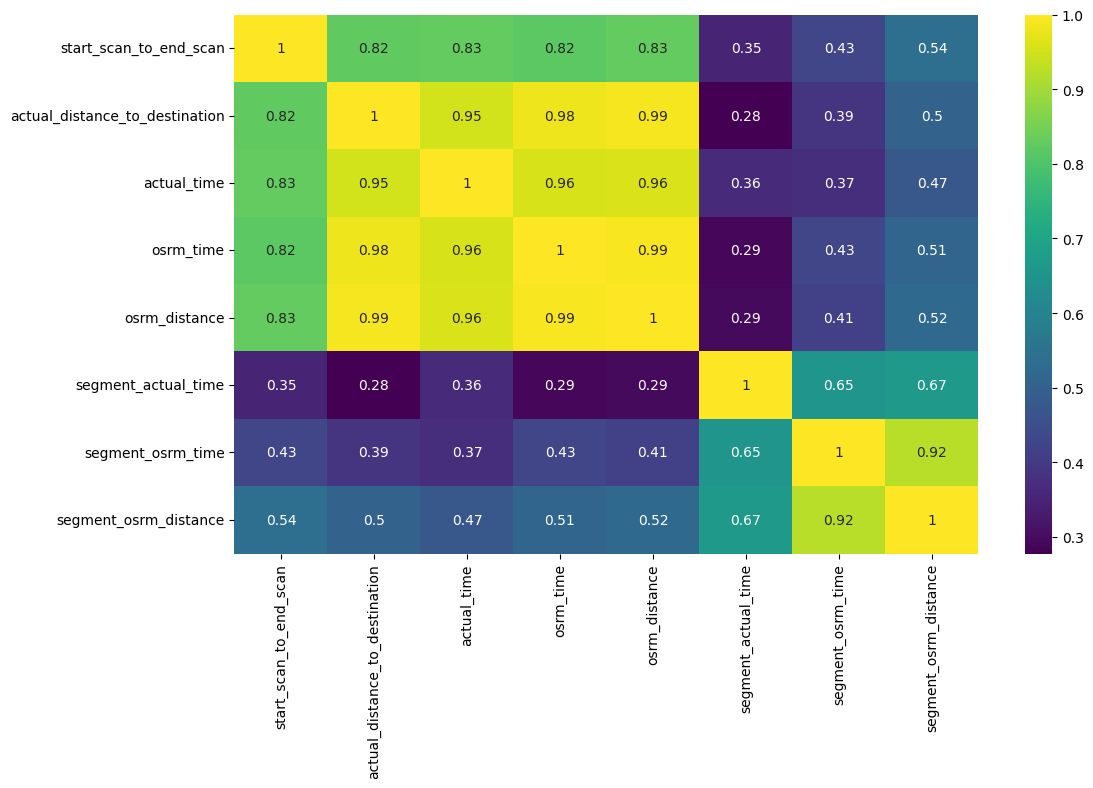

In [ ]:
# Correlation Heatmap -

plt.figure(figsize=(12, 7))
sns.heatmap(dfn.corr(method='spearman'),annot=True, cmap='viridis')
plt.show()

* 'actual_distance_to_destination', 'actual_time', 'osrm_time',  'osrm_distance', are highly correlated to each other

* 'segment_osrm_time', 'segment_osrm_distance' are also correlated each other

In [ ]:
len(num_cols)

8

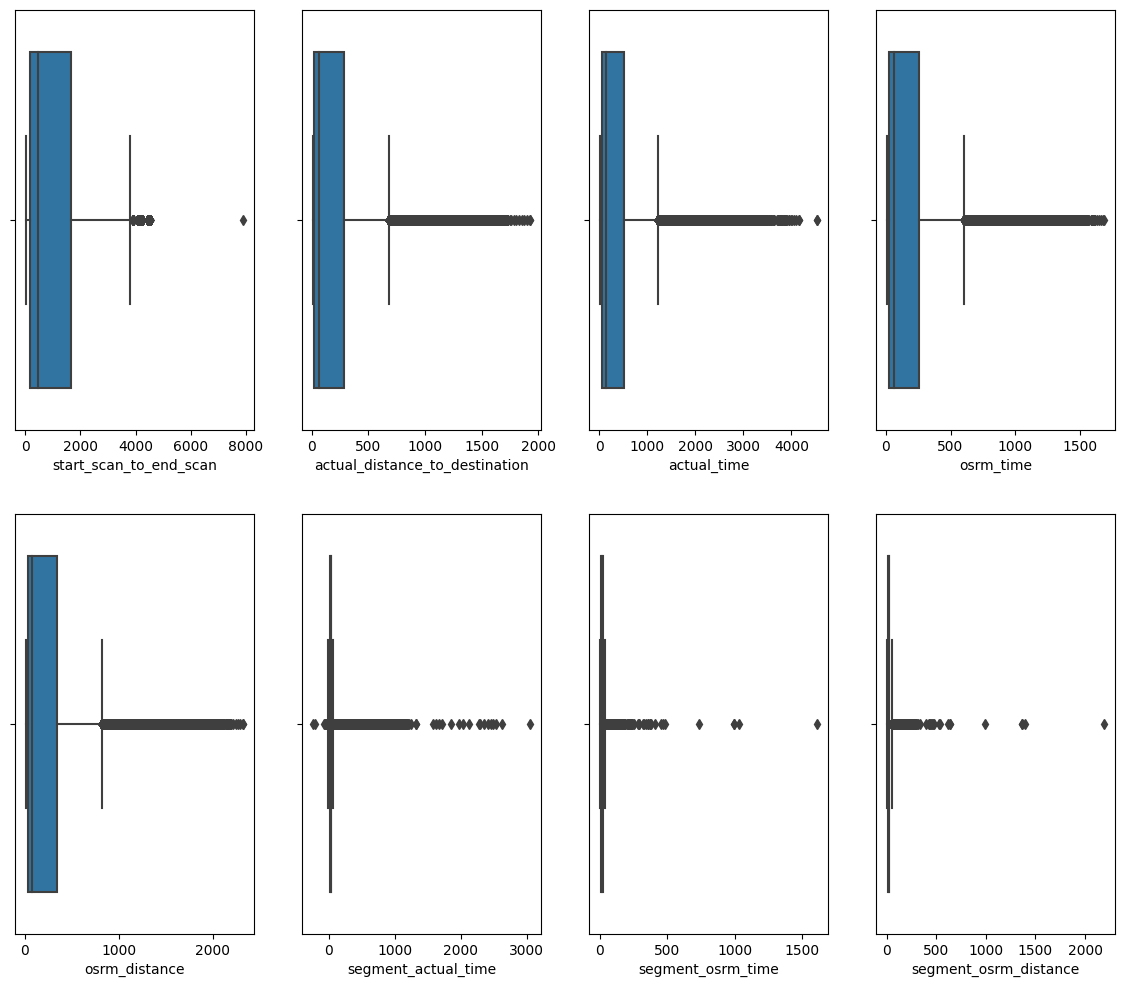

In [ ]:
fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(right = 1.5)

for plot in range(1,9):
    plt.subplot(2,4, plot)
    sns.boxplot(x=df[num_cols[plot-1]])

plt.show()
# All attributes have outliers

# Feature Creation

In [ ]:
#Splitting the Destination name column into three columns : destination city, destination place, destination state
dcol = dfn['destination_name'].str.split('_',n=2,expand=True)
dfn["destination_city"] = dcol[0]
dfn["destination_place"] = dcol[1]
dfn["destination_state"] = dcol[2]

In [ ]:
#Splitting the source name column into three columns : source city, source place, source state
scol = dfn['source_name'].str.split('_',n=2,expand=True)
dfn["source_city"] = scol[0]
dfn["source_place"] = scol[1]
dfn["source_state"] = scol[2]

In [ ]:
# Splitting trip_creation_time column into three columns: trip_day, trip_year, trip_month
dfn["trip_day"] = pd.to_datetime(dfn['trip_creation_time']).dt.day
dfn["trip_year"] = pd.to_datetime(dfn['trip_creation_time']).dt.year
dfn["trip_month"] = pd.to_datetime(dfn['trip_creation_time']).dt.month

In [ ]:
dfn

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,destination_city,destination_place,destination_state,source_city,source_place,source_state,trip_day,trip_year,trip_month
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.7590,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.8152,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,13.0224,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,3.9153,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,8.1858,Gurgaon,Bilaspur,HB (Haryana),Sonipat,Kundli,H (Haryana),20,2018,9
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,17.3725,Gurgaon,Bilaspur,HB (Haryana),Sonipat,Kundli,H (Haryana),20,2018,9
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,20.7053,Gurgaon,Bilaspur,HB (Haryana),Sonipat,Kundli,H (Haryana),20,2018,9
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,18.8885,Gurgaon,Bilaspur,HB (Haryana),Sonipat,Kundli,H (Haryana),20,2018,9


In [ ]:
dfn.isna().sum()

data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
destination_city                      0
destination_place                  2432
destination_state                 15433
source_city                           0
source_place                       2098
source_state                      14628


In [ ]:
#replacing missing value of place and state
dfn["destination_place"] = dfn["destination_place"].fillna(dfn["destination_city"])
dfn["destination_state"] = dfn["destination_state"].fillna(dfn["destination_place"])
dfn["source_place"] = dfn["source_place"].fillna(dfn["source_city"])
dfn["source_state"] = dfn["source_state"].fillna(dfn["source_place"])

In [ ]:
dfn.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
destination_city                  0
destination_place                 0
destination_state                 0
source_city                       0
source_place                      0
source_state                      0
trip_day                          0
trip_year                         0
trip_month                  

In [ ]:
dfn.drop(columns=['source_name', 'destination_name'],inplace=True)

In [ ]:
dfn.shape

(144316, 26)

In [ ]:
# Calculated the total taken in hours and stored it in new column "time_taken_hours"
dfn["od_end_time"] = pd.to_datetime(dfn['od_end_time'])
dfn["od_start_time"] = pd.to_datetime(dfn['od_start_time'])
dfn["time_taken_hours"] = (dfn["od_end_time"]-dfn["od_start_time"]).dt.total_seconds() / 60 / 60

In [ ]:
dfn.shape

(144316, 27)

In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   destination_center              144316 non-null  object        
 7   od_start_time                   144316 non-null  datetime64[ns]
 8   od_end_time                     144316 non-null  datetime64[ns]
 9   start_scan_to_end_scan          144316 non-null  float64       
 10  actual_distance_to_destination  144316 non-null  float64

# Merging of rows and aggregation of fields

In [ ]:
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [ ]:
da = dfn

In [ ]:
data = pd.DataFrame(dfn.groupby(['trip_uuid', 'source_center', 'destination_center' ]).agg({'actual_time':'max','osrm_time':'max','segment_actual_time':'sum',
                                                                                           'segment_osrm_time':'sum','actual_distance_to_destination':'max',
                                                                                           'osrm_distance':'max','segment_osrm_distance':'sum'}))
data.reset_index(inplace=True)
data.shape

(26222, 10)

In [ ]:
data

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,732.0,349.0,728.0,534.0,383.759164,446.5496,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,830.0,394.0,820.0,474.0,440.973689,544.8027,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,47.0,26.0,46.0,26.0,24.644021,28.1994,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,96.0,42.0,95.0,39.0,48.542890,56.9116,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,611.0,212.0,608.0,231.0,242.309306,281.2109,317.7408
...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,51.0,41.0,49.0,42.0,33.627182,42.5213,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,90.0,48.0,89.0,77.0,33.673835,40.6080,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,30.0,14.0,29.0,14.0,12.661945,16.0185,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,233.0,42.0,233.0,42.0,40.546740,52.5303,52.5303


In [ ]:
data1 = pd.DataFrame(dfn.groupby(['trip_uuid']).agg({'actual_time':'max','osrm_time':'max','segment_actual_time':'sum',
                                                                                           'segment_osrm_time':'sum','actual_distance_to_destination':'max',
                                                                                           'osrm_distance':'max','segment_osrm_distance':'sum'}))
data1.reset_index(inplace=True)
data1

,trip_uuid,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,830.0,394.0,1548.0,1008.0,440.973689,544.8027,1320.4733
1,trip-153671042288605164,96.0,42.0,141.0,65.0,48.542890,56.9116,84.1894
2,trip-153671043369099517,2736.0,1529.0,3308.0,1941.0,1689.964663,2090.8743,2545.2678
3,trip-153671046011330457,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766
4,trip-153671052974046625,147.0,46.0,340.0,115.0,59.530350,63.6461,146.7919
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,49.0,34.0,82.0,62.0,31.261599,44.5639,64.8551
14783,trip-153861104386292051,21.0,12.0,21.0,11.0,15.513784,16.0882,16.0883
14784,trip-153861106442901555,190.0,29.0,281.0,88.0,19.349008,32.2277,104.8866
14785,trip-153861115439069069,90.0,50.0,258.0,221.0,37.387664,52.8070,223.5324


# Comparison & Visualization of time and distance fields

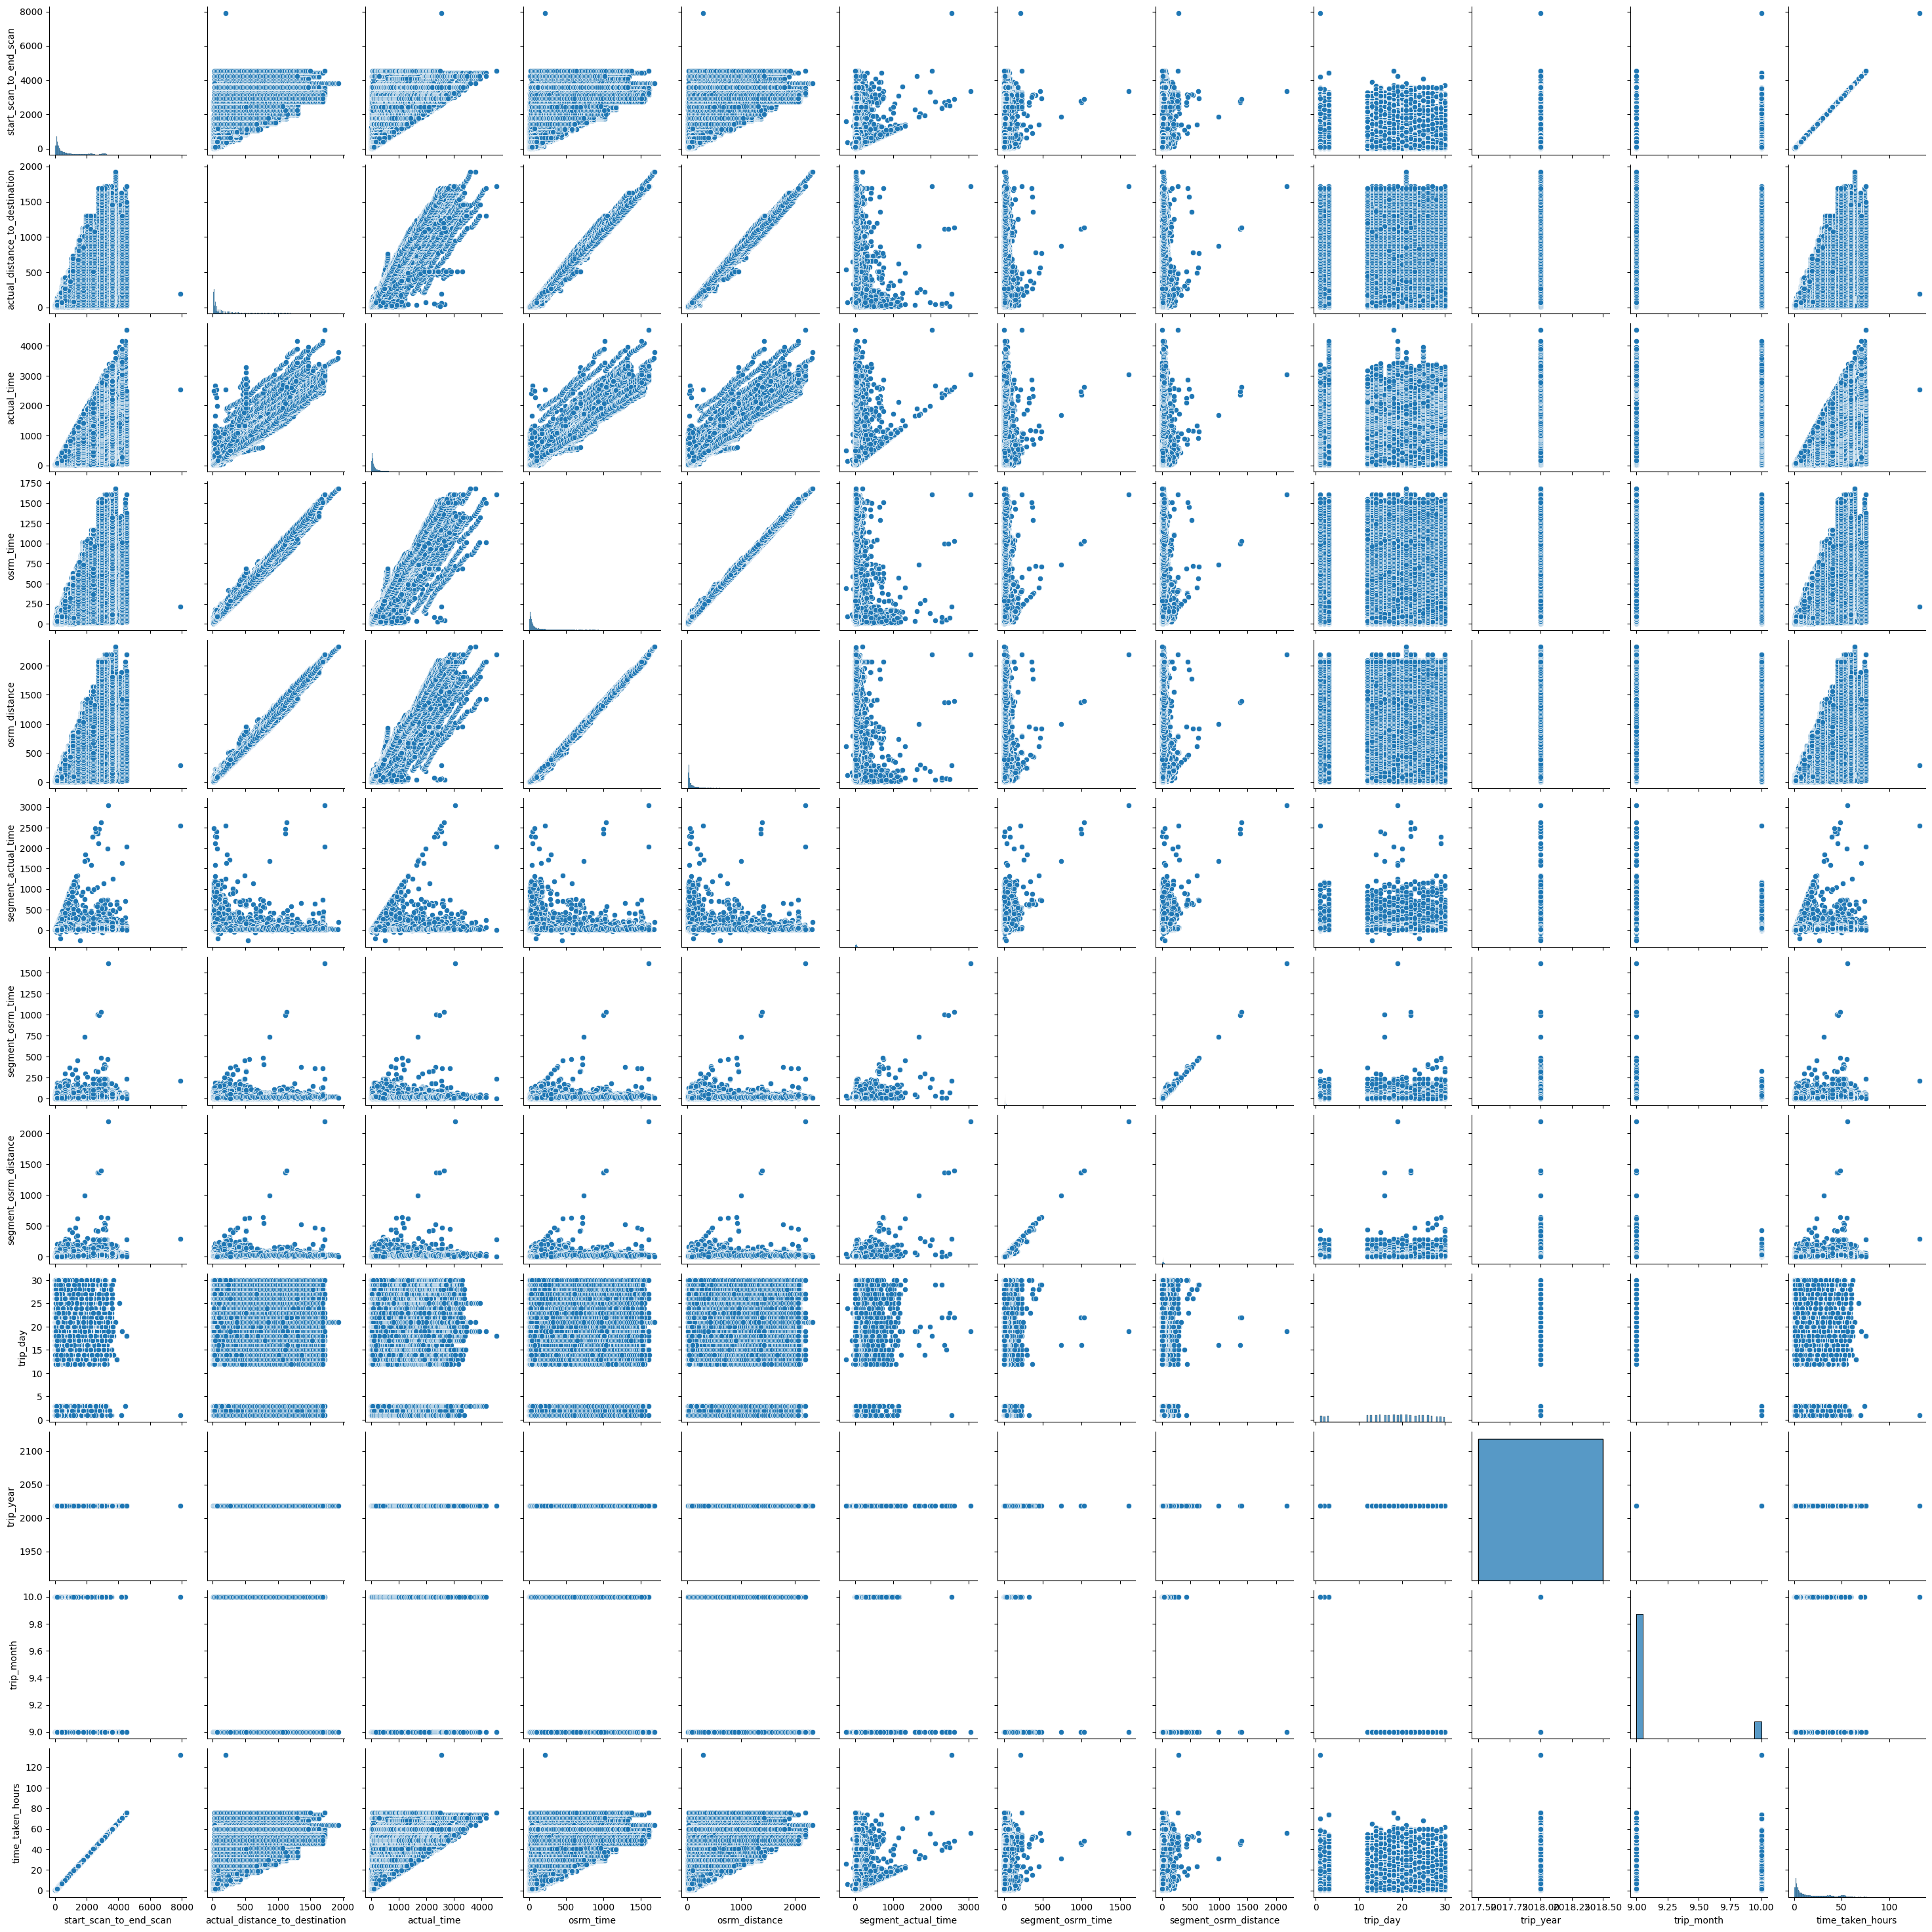

In [ ]:
sns.pairplot(data=dfn)

# Missing values Treatment & Outlier treatment

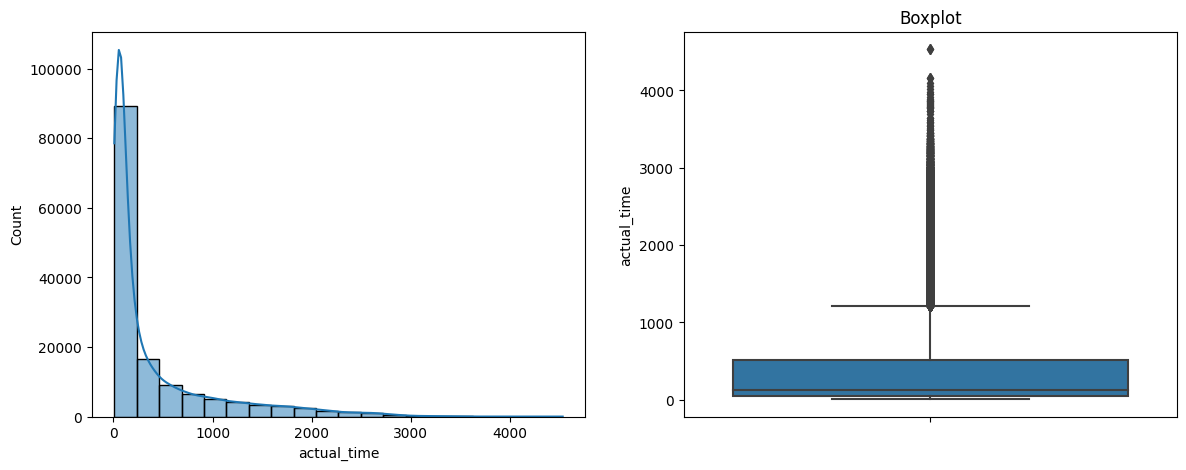

In [ ]:
# Checking distribution of 'actual_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['actual_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['actual_time'])
plt.title('Boxplot')

plt.show()

We can see that outliers are present in the given columns. We need to figure out a way to deal with them before starting with the tests.

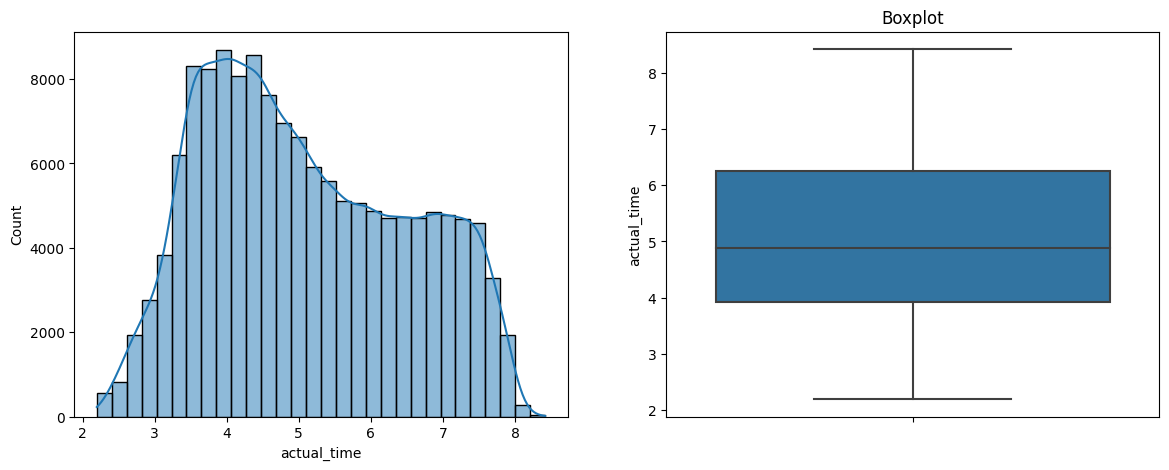

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['actual_time']), bins=30,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['actual_time']))
plt.title('Boxplot')

plt.show()
#outliers are removed

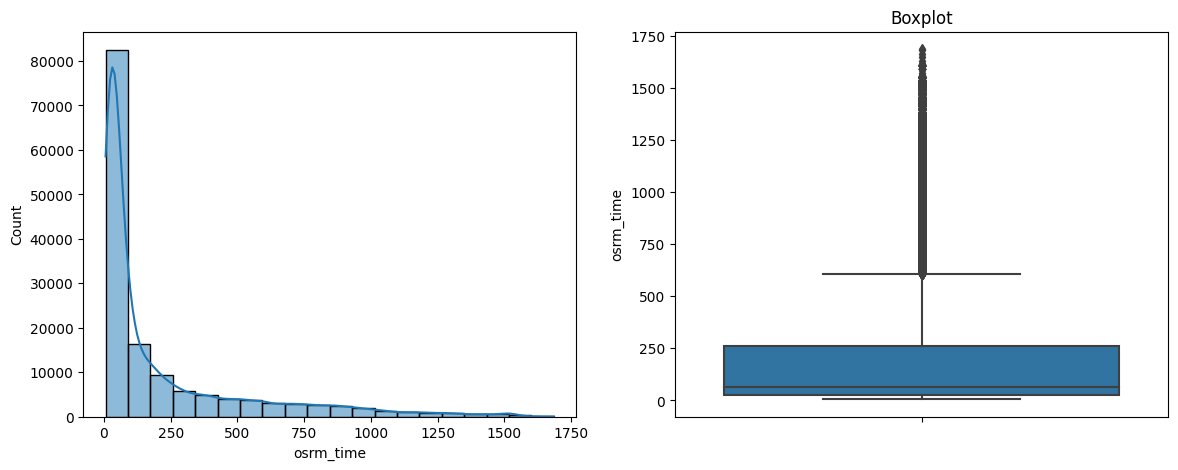

In [ ]:
# Checking distribution of 'osrm_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['osrm_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['osrm_time'])
plt.title('Boxplot')

plt.show()

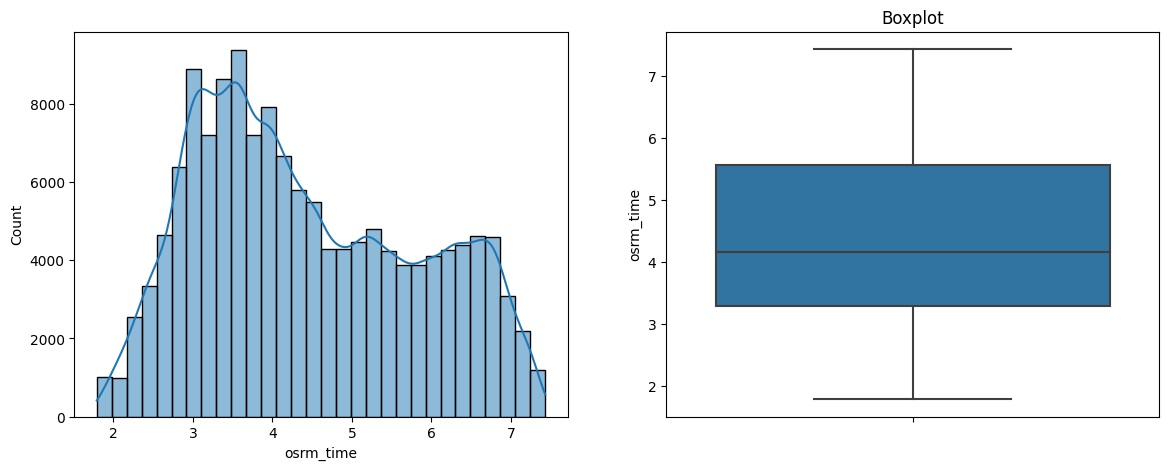

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['osrm_time']), bins=30,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['osrm_time']))
plt.title('Boxplot')

plt.show()
#outliers are removed

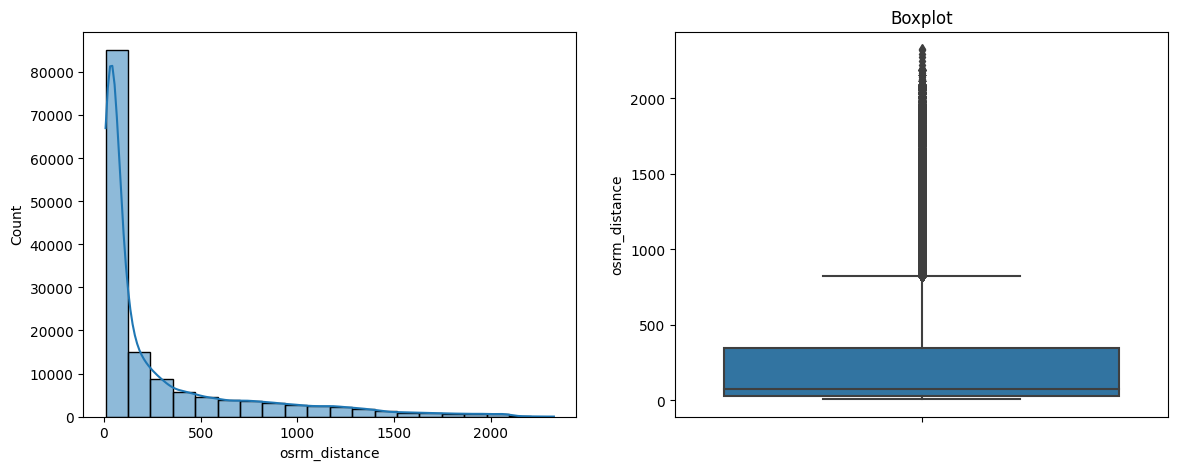

In [ ]:
# Checking distribution of 'osrm_distance' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['osrm_distance'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['osrm_distance'])
plt.title('Boxplot')

plt.show()

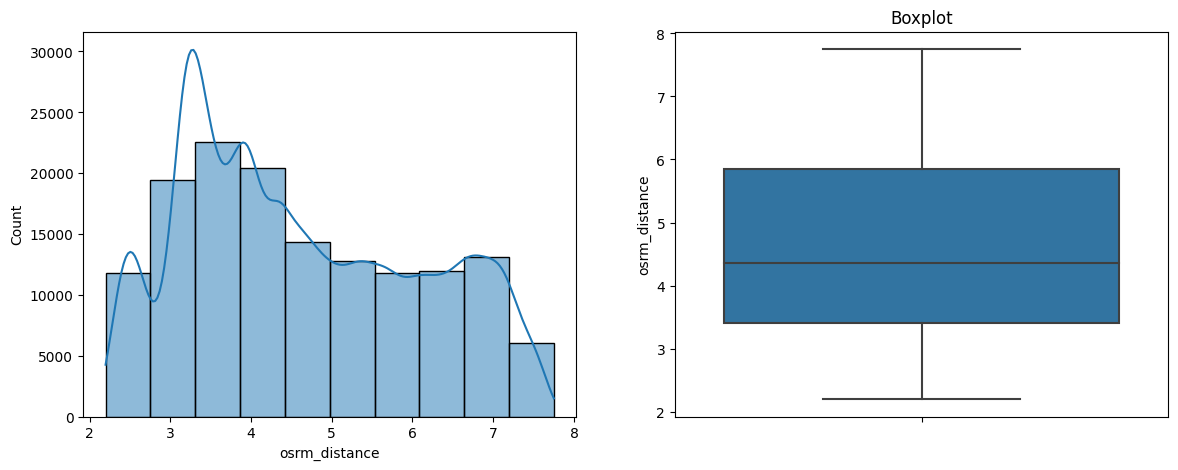

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['osrm_distance']), bins=10,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['osrm_distance']))
plt.title('Boxplot')

plt.show()
#outliers are removed

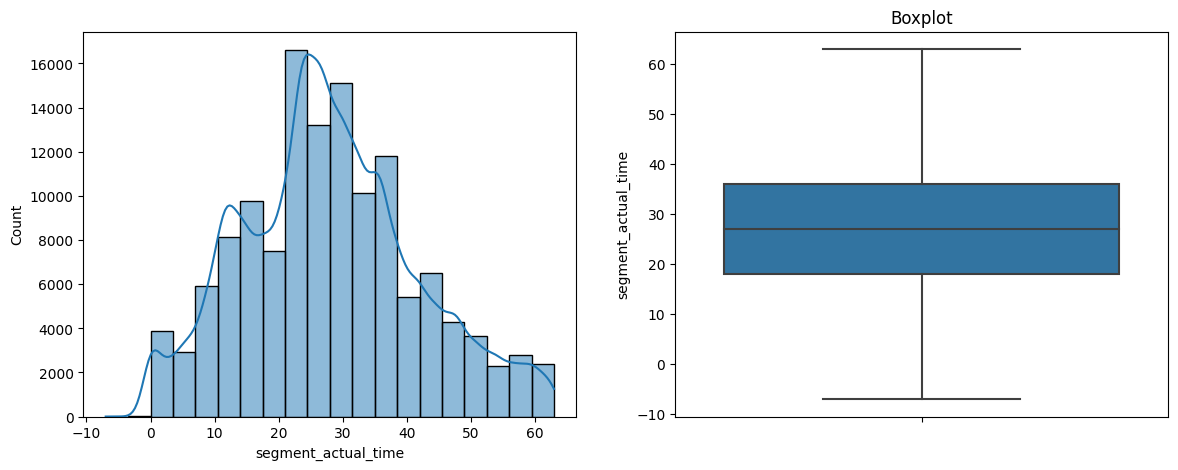

In [ ]:
# Checking distribution of 'segment_actual_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_actual_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_actual_time'])
plt.title('Boxplot')

plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


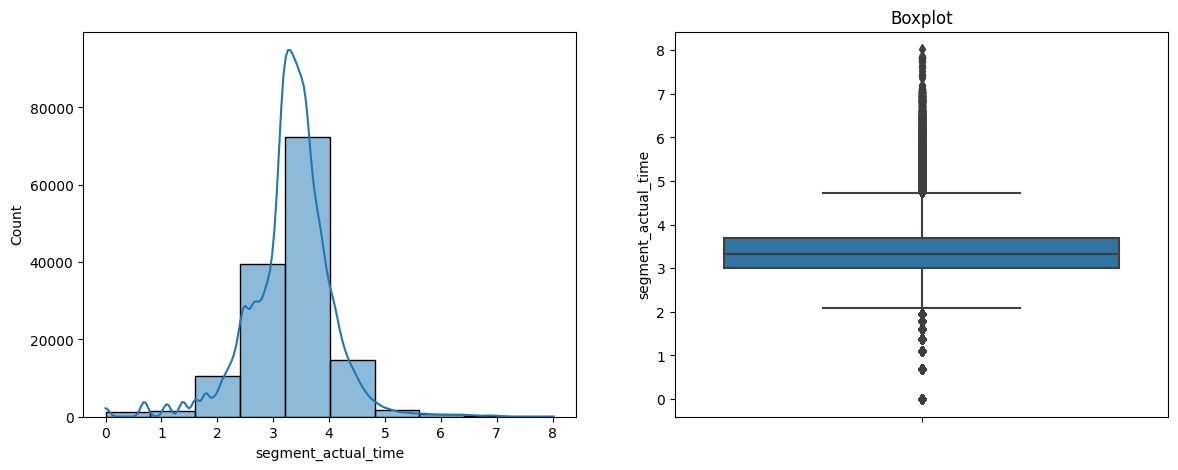

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['segment_actual_time']), bins=10,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['segment_actual_time']))
plt.title('Boxplot')

plt.show()
#most of outliers are removed

In [ ]:
# Outlier Treatment using IQR
q1 = dfn['segment_actual_time'].quantile(0.25)
q3 = dfn['segment_actual_time'].quantile(0.75)
iqr = q3-q1
dfn = dfn[(dfn['segment_actual_time']>(q1-1.5*iqr) ) & (dfn['segment_actual_time']<(q3+1.5*iqr))]
print("No. of rows : ", dfn.shape[0])
#Outliers were removed

No. of rows :  132373


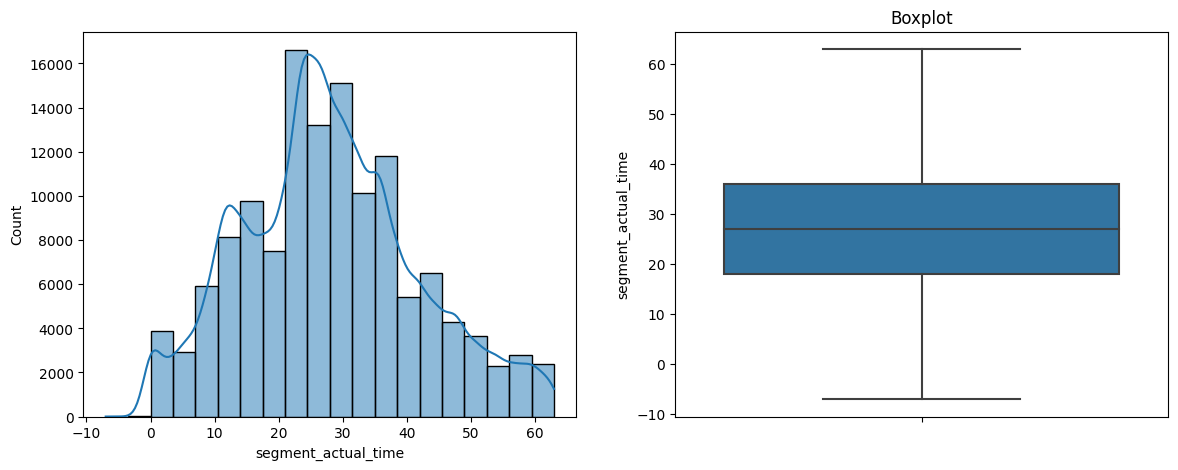

In [ ]:
# Checking distribution of 'segment_actual_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_actual_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_actual_time'])
plt.title('Boxplot')

plt.show()

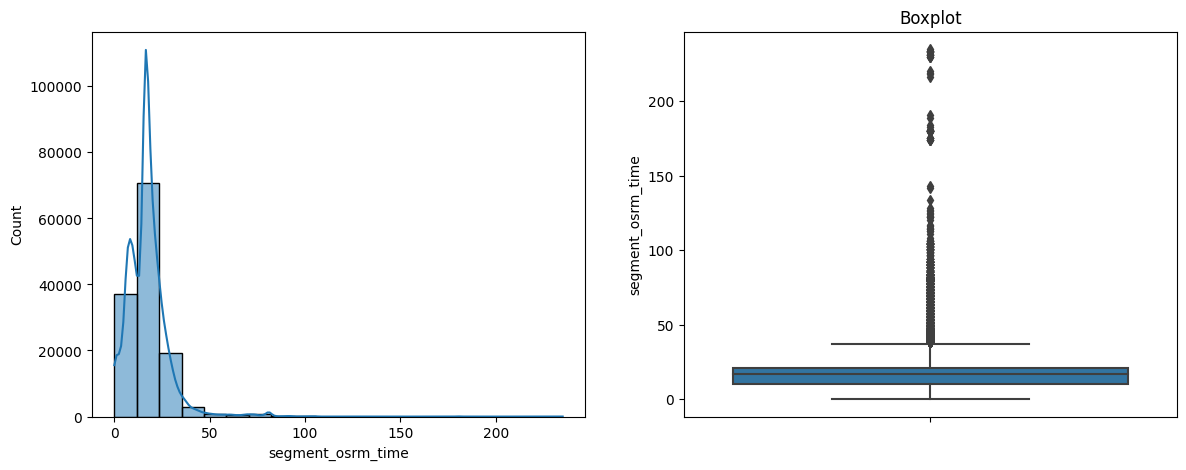

In [ ]:
# Checking distribution of 'segment_actual_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_osrm_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_osrm_time'])
plt.title('Boxplot')

plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


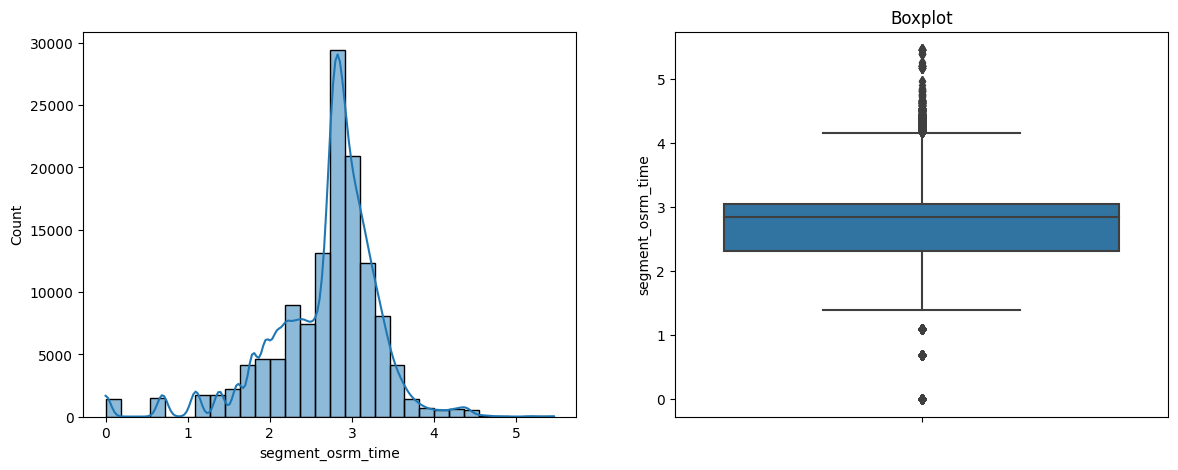

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['segment_osrm_time']), bins=30,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['segment_osrm_time']))
plt.title('Boxplot')

plt.show()
#outlers are not removed

In [ ]:
# Outlier Treatment using IQR
q1 = dfn['segment_osrm_time'].quantile(0.25)
q3 = dfn['segment_osrm_time'].quantile(0.75)
iqr = q3-q1
dfn = dfn[(dfn['segment_osrm_time']>(q1-1.5*iqr) ) & (dfn['segment_osrm_time']<(q3+1.5*iqr))]
print("No. of rows : ", dfn.shape[0])
#Outliers were removed

No. of rows :  128132


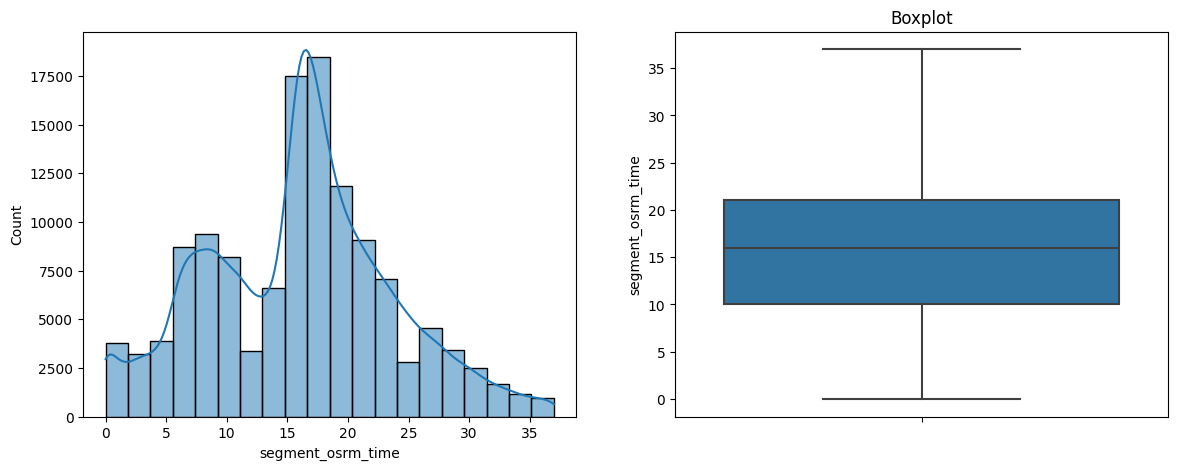

In [ ]:
# Checking distribution of 'segment_actual_time' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_osrm_time'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_osrm_time'])
plt.title('Boxplot')

plt.show()
#outliers are removed

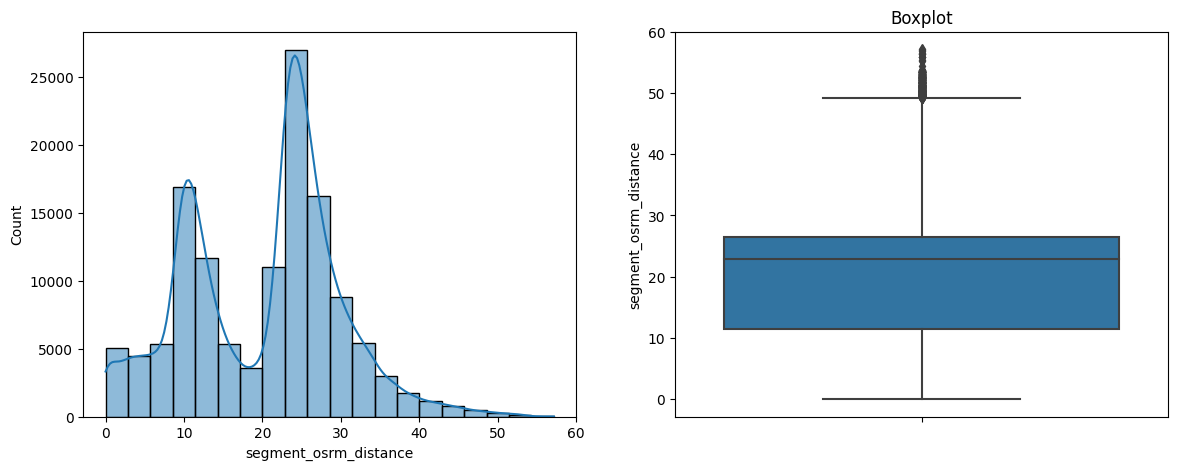

In [ ]:
# Checking distribution of 'segment_actual_distance' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_osrm_distance'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_osrm_distance'])
plt.title('Boxplot')

plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


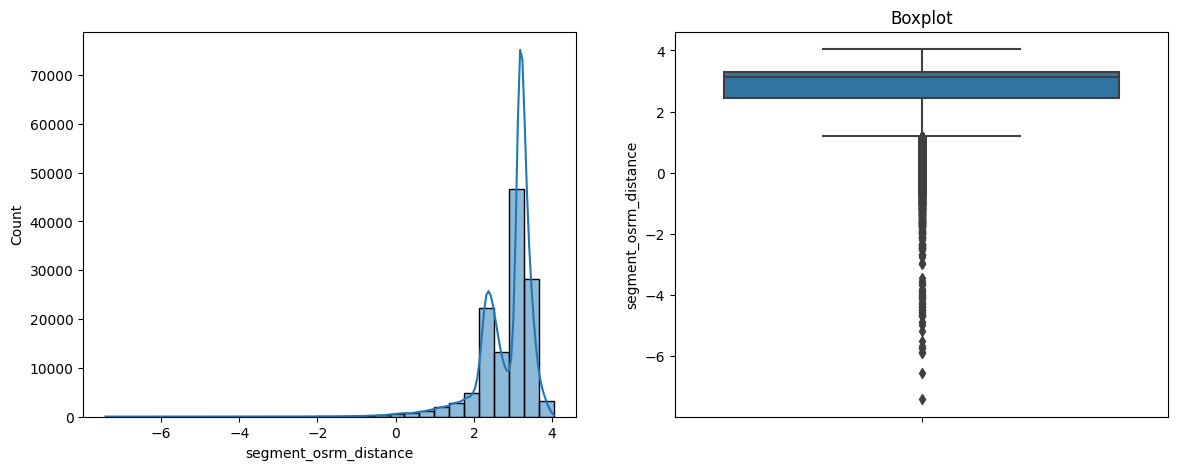

In [ ]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(dfn['segment_osrm_distance']), bins=30,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(dfn['segment_osrm_distance']))
plt.title('Boxplot')

plt.show()
#outlers are not removed

In [ ]:
# Outlier Treatment using IQR
q1 = dfn['segment_osrm_distance'].quantile(0.25)
q3 = dfn['segment_osrm_distance'].quantile(0.75)
iqr = q3-q1
dfn = dfn[(dfn['segment_osrm_distance']>(q1-1.5*iqr) ) & (dfn['segment_osrm_distance']<(q3+1.5*iqr))]
print("No. of rows : ", dfn.shape[0])
#Outliers were removed

No. of rows :  127767


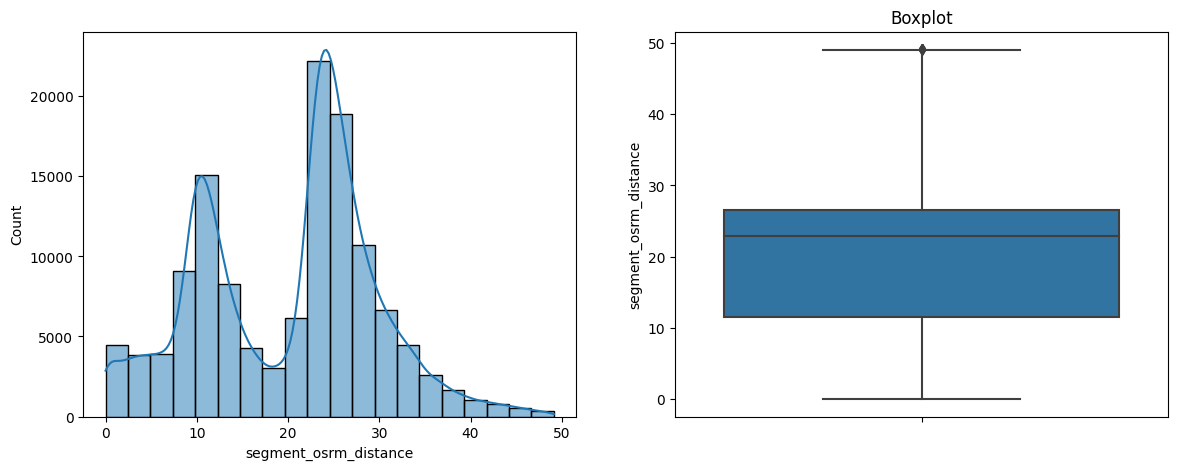

In [ ]:
# Checking distribution of 'segment_actual_distance' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(dfn['segment_osrm_distance'], bins=20,kde=True)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dfn['segment_osrm_distance'])
plt.title('Boxplot')

plt.show()
#outliers are removed

# Checking relationship between aggregated fields

# Q1: Is there any correlation between actual time and osrm time ?
 Testing it using Pearson method


In [ ]:
trip_actual_osrm = pd.DataFrame(dfn.groupby(['trip_uuid']).agg({'actual_time':'max','osrm_time':'max'}))
trip_actual_osrm

,actual_time,osrm_time
trip_uuid,,
trip-153671041653548748,830.0,394.0
trip-153671042288605164,96.0,42.0
trip-153671043369099517,2652.0,1529.0
trip-153671046011330457,59.0,15.0
trip-153671052974046625,147.0,46.0
...,...,...
trip-153861095625827784,49.0,34.0
trip-153861104386292051,21.0,12.0
trip-153861106442901555,92.0,24.0


In [ ]:
pea_corr = np.corrcoef(x = trip_actual_osrm["actual_time"],
           y = trip_actual_osrm["osrm_time"])[0][1]
pea_corr
#there is high correlation between actual time and osrm time

0.9764775056136807

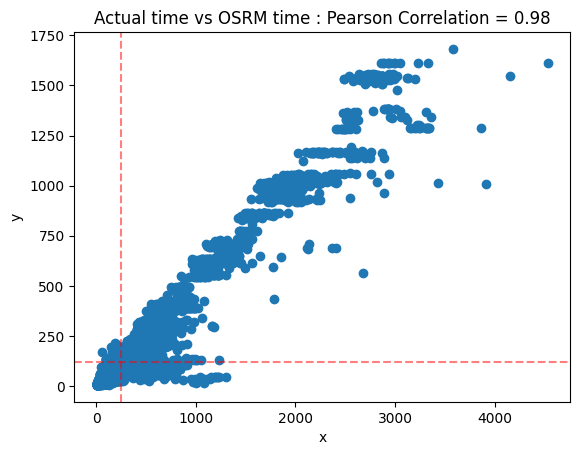

In [ ]:
plt.scatter(x = trip_actual_osrm["actual_time"], y = trip_actual_osrm["osrm_time"])
plt.title(f"Actual time vs OSRM time : Pearson Correlation = {np.round(pea_corr,2)}")
plt.xlabel("x")
plt.ylabel("y")

plt.axhline(y = trip_actual_osrm["osrm_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

plt.axvline(x = trip_actual_osrm["actual_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)


# Q2: Is there any correlation between actual time and segment actual time ?
 Testing it using Pearson method

In [ ]:
trip_actual_segment = pd.DataFrame(dfn.groupby(['trip_uuid']).agg({'actual_time':'max','segment_actual_time':'sum'}))
trip_actual_segment

,actual_time,segment_actual_time
trip_uuid,,
trip-153671041653548748,830.0,961.0
trip-153671042288605164,96.0,141.0
trip-153671043369099517,2652.0,2747.0
trip-153671046011330457,59.0,59.0
trip-153671052974046625,147.0,261.0
...,...,...
trip-153861095625827784,49.0,82.0
trip-153861104386292051,21.0,21.0
trip-153861106442901555,92.0,29.0


In [ ]:
pea_corr = np.corrcoef(x = trip_actual_segment["actual_time"],
           y = trip_actual_segment["segment_actual_time"])[0][1]
pea_corr
#there is high correlation between actual time and segment actual time

0.9287294950908209

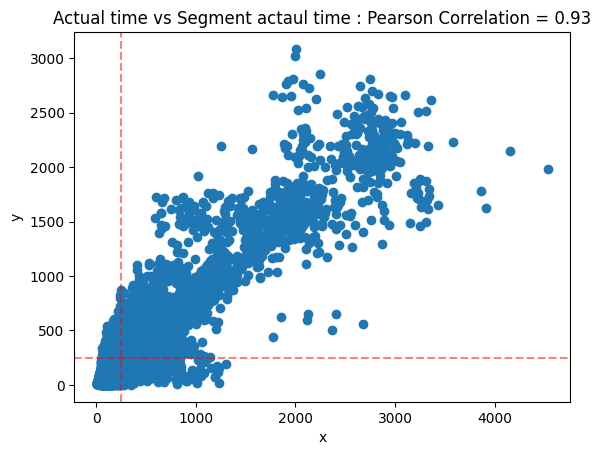

In [ ]:
plt.scatter(x = trip_actual_segment["actual_time"], y = trip_actual_segment["segment_actual_time"])
plt.title(f"Actual time vs Segment actaul time : Pearson Correlation = {np.round(pea_corr,2)}")
plt.xlabel("x")
plt.ylabel("y")

plt.axhline(y = trip_actual_segment["segment_actual_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

plt.axvline(x = trip_actual_segment["actual_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

# Q3: Is there any correlation between osrm distance and segment osrm distance ?
 Testing it using Pearson method

In [ ]:
trip_osrm_segment_distance = pd.DataFrame(dfn.groupby(['trip_uuid']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'}))
trip_osrm_segment_distance

,osrm_distance,segment_osrm_distance
trip_uuid,,
trip-153671041653548748,544.8027,774.7292
trip-153671042288605164,56.9116,84.1894
trip-153671043369099517,2090.8743,2298.4893
trip-153671046011330457,19.6800,19.8766
trip-153671052974046625,63.6461,117.7381
...,...,...
trip-153861095625827784,44.5639,64.8551
trip-153861104386292051,16.0882,16.0883
trip-153861106442901555,28.8492,50.3909


In [ ]:
pea_corr = np.corrcoef(x = trip_osrm_segment_distance["osrm_distance"], y = trip_osrm_segment_distance["segment_osrm_distance"])[0][1]
pea_corr
#there is high correlation between actual time and segment actual time

0.9567297325895183

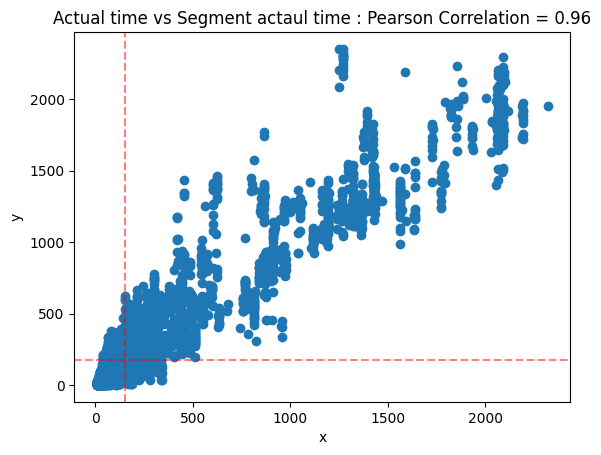

In [ ]:
plt.scatter(x = trip_osrm_segment_distance["osrm_distance"], y = trip_osrm_segment_distance["segment_osrm_distance"])
plt.title(f"Actual time vs Segment actaul time : Pearson Correlation = {np.round(pea_corr,2)}")
plt.xlabel("x")
plt.ylabel("y")

plt.axhline(y = trip_osrm_segment_distance["segment_osrm_distance"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

plt.axvline(x = trip_osrm_segment_distance["osrm_distance"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

#Q4: Is there any correlation between osrm time and segment osrm time ?
Testing it using Pearson method

In [ ]:
trip_osrm_segment_time = pd.DataFrame(dfn.groupby(['trip_uuid']).agg({'osrm_time':'max','segment_osrm_time':'sum'}))
trip_osrm_segment_time

,osrm_time,segment_osrm_time
trip_uuid,,
trip-153671041653548748,394.0,566.0
trip-153671042288605164,42.0,65.0
trip-153671043369099517,1529.0,1680.0
trip-153671046011330457,15.0,16.0
trip-153671052974046625,46.0,89.0
...,...,...
trip-153861095625827784,34.0,62.0
trip-153861104386292051,12.0,11.0
trip-153861106442901555,24.0,35.0


In [ ]:
pea_corr = np.corrcoef(x = trip_osrm_segment_time["osrm_time"],
           y = trip_osrm_segment_time["segment_osrm_time"])[0][1]
pea_corr
#there is high correlation between actual time and segment actual time

0.951738970211692

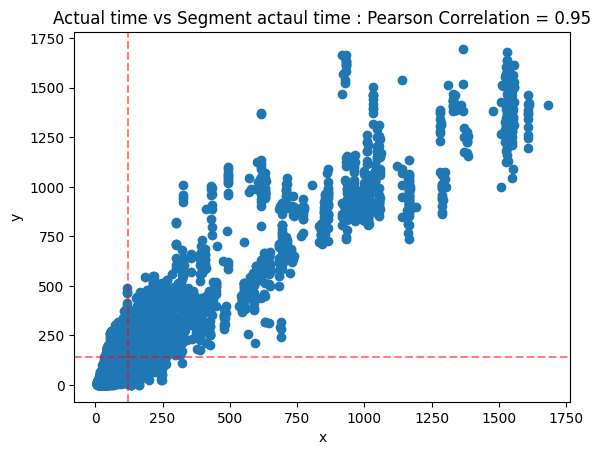

In [ ]:
plt.scatter(x = trip_osrm_segment_time["osrm_time"], y = trip_osrm_segment_time["segment_osrm_time"])
plt.title(f"Actual time vs Segment actaul time : Pearson Correlation = {np.round(pea_corr,2)}")
plt.xlabel("x")
plt.ylabel("y")

plt.axhline(y = trip_osrm_segment_time["segment_osrm_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

plt.axvline(x = trip_osrm_segment_time["osrm_time"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

# Handling categorical values

In [ ]:
dfn.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,destination_state,source_city,source_place,source_state,trip_day,trip_year,trip_month,time_taken_hours
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,2018,9,1.436894


In [ ]:
# Applying one-hot encoding of categorical variables on route_type attributes
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col='route_type'
dfn[col] = label_encoder.fit_transform(dfn[col])

In [ ]:
dfn["route_type"].value_counts()

In [ ]:
col='data'
dfn[col] = label_encoder.fit_transform(dfn[col])

In [ ]:
dfn["data"].value_counts()

1    92403
0    35364
Name: data, dtype: int64

In [ ]:
dfn.dtypes

data                                       int64
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                 int64
trip_uuid                                 object
source_center                             object
destination_center                        object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
destination_city                          object
destination_place                         object
destination_state                         object
source_city         

# Column Normalization /Column Standardization

In [ ]:
num_cols = dfn.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols = ['data','route_type','start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
 'segment_osrm_time', 'segment_osrm_distance', 'trip_day', 'trip_year', 'trip_month', 'time_taken_hours']

In [ ]:
df_num = dfn[num_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_data = scaler.fit_transform(df_num)

std_data = pd.DataFrame(std_data, columns=df_num.columns)

std_data.head()

,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_day,trip_year,trip_month,time_taken_hours
0,0.61864,-1.408604,-0.823833,-0.639784,-0.654647,-0.645682,-0.636388,-1.003775,-0.658586,-0.850398,0.207706,0.0,-0.372237,-0.824107
1,0.61864,-1.408604,-0.823833,-0.614937,-0.637697,-0.616203,-0.613015,-1.297851,-0.921217,-1.078529,0.207706,0.0,-0.372237,-0.824107
2,0.61864,-1.408604,-0.823833,-0.589507,-0.610578,-0.590001,-0.587112,-0.856737,-1.183848,-0.969318,0.207706,0.0,-0.372237,-0.824107
3,0.61864,-1.408604,-0.823833,-0.564720,-0.573288,-0.550697,-0.555922,-0.489142,-0.527271,-0.741093,0.207706,0.0,-0.372237,-0.824107
4,0.61864,-1.408604,-0.823833,-0.555168,-0.563118,-0.537595,-0.535191,-1.591927,-1.446478,-1.682767,0.207706,0.0,-0.372237,-0.824107


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_data = scaler.fit_transform(df_num)

minmax_data = pd.DataFrame(minmax_data, columns=df_num.columns)

minmax_data.head()

,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_day,trip_year,trip_month,time_taken_hours
0,1.0,0.0,0.014618,0.000750,0.001105,0.002983,0.001280,0.300000,0.297297,0.243499,0.655172,0.0,0.0,0.01451
1,1.0,0.0,0.014618,0.005188,0.003316,0.008353,0.005503,0.242857,0.243243,0.198600,0.655172,0.0,0.0,0.01451
2,1.0,0.0,0.014618,0.009731,0.006854,0.013126,0.010183,0.328571,0.189189,0.220094,0.655172,0.0,0.0,0.01451
3,1.0,0.0,0.014618,0.014159,0.011718,0.020286,0.015818,0.400000,0.324324,0.265011,0.655172,0.0,0.0,0.01451
4,1.0,0.0,0.014618,0.015866,0.013044,0.022673,0.019564,0.185714,0.135135,0.079678,0.655172,0.0,0.0,0.01451


In [ ]:
dfn['time_taken_hours'].value_counts()

51.662060    73
52.660464    72
50.600829    72
51.630326    72
63.368436    71
             ..
4.601266      1
7.570479      1
1.448245      1
2.630222      1
13.388657     1
Name: time_taken_hours, Length: 25274, dtype: int64

In [ ]:
dfn["trip_year"].value_counts()

2018    127767
Name: trip_year, dtype: int64

In [ ]:
dfn["trip_month"].value_counts()

9     112218
10     15549
Name: trip_month, dtype: int64

In [ ]:
dfn["trip_day"].value_counts()

21    6741
15    6533
18    6495
20    6381
13    6307
25    6299
17    6242
26    6211
12    6126
22    6052
14    6047
16    5961
19    5800
24    5766
3     5445
23    5442
27    5342
1     5278
28    5113
29    5023
2     4826
30    4337
Name: trip_day, dtype: int64

<Axes: xlabel='trip_day', ylabel='count'>

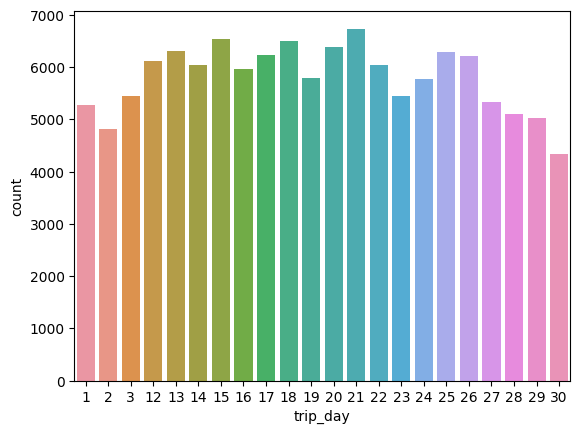

In [ ]:
sns.countplot(x = dfn["trip_day"])

# Business Insights and Recommendations

EDA based insights
1.	Total of 144867 rows are present in the dataset
2.	Total 24 attributes
3.	Categorical data

* a. data - 2 unique values
      * Training    (104632)
      * test         (39684)                      
b.	trip_creation_time - 14787 unique values
     	 * 2018-10-01 05:04:55.268931 with the highest frequency of 101    
c.	route_schedule_uuid   - 1497
    	  * thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    (1812 times repeated)       
d.	route_type   - 2 unique values
      * FTL       (99132)
      * Carting    (45184)                 
e.	trip_uuid    - 14787 unique values (similar to trip_creation_time)
      * trip-153837029526866991 with highest frequency of 101   

  f.	source_center     - 1496 unique values
  
  * IND000000ACB    (23267 times repeated)                  
g.	source_name      - 1496 unique values           
     	 * Gurgaon_Bilaspur_HB (Haryana)    (23267 times repeated)
h.	destination_center   - 1466 unique values  
      * IND000000ACB    (15192 times repeated)       
i.	destination_name    - 1466 unique values  
       * Gurgaon_Bilaspur_HB (Haryana)        (15192 times repeated)  
j.	od_start_time      - 26223 unique values
      * 2018-09-21 18:37:09.322207    (81 times repeated)        
k.	od_end_time  - 26223 unique values
      * 2018-09-24 09:59:15.691618    (81 times repeated)

4.	Numerical data                 
a.	start_scan_to_end_scan - 1914 unique values
       * 110.0     (459 times repeated)  
b.	actual_distance_to_destination - 143965 unique values
* 101.686163 repeeated 2 times
c.	actual_time - 3182 unique values
      * "32.0" - repeated 1440 times                    
d.	osrm_time  - 1531 unique values
      * "21.0" repeated 2392 times                     
e.	osrm_distance - 137544 unique values
    * 48.0394 repeated 11 times      
*  f.	segment_actual_time - 746 unique values
* 24.0 repeated 6165 times            
g.	segment_osrm_time - 214 unique values
      * 16.0 repeated 11429 times           
h.	segment_osrm_distance - 113497 unique values
      * 0.0000     1531        
There were 293 missing values for “source_name” attributes and 261 missing values for “destination_name” attributes. Those rows were dropped from the dataset and it was only 0.38% of the whole dataset
5.	actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', are highly correlated to each other
6.	'segment_osrm_time', and 'segment_osrm_distance' are also correlated with each other
7.	“Destination_name” column was split into three columns: destination city, destination place, the destination state
8.	“Source_name” column was split into three columns: source city, source place, source state
9.	“trip_creation_time” column was split into three columns: trip_day, trip_year, trip_month
10.	After column splitting, missing values were found and replaced
11.	The total time taken in hours for delivery was calculated from “od_start_time” and “od_end_time” columns and stored it in new column "time_taken_hours"
12.	Outliers in the numerical data were treated either using log function or IQR methods
13.	The given dataset from 2018


## Insights from correlation testing

The correlation between the following various time and distance attributes were tested using Pearson method and found highly correlated
1.	actual_time aggregated value and OSRM time aggregated value
2.	actual_time aggregated value and segment actual time aggregated value
3.	osrm distance aggregated value and segment osrm distance aggregated value
4.	osrm time aggregated value and segment osrm time aggregated value


## Recommendations

1.	As there is a correlation between the actual, OSRM and segment value of time and distance, the data team can use the OSRM method to develop the system to predict the delivery pattern
2.	From the source name and destination name information and tracking the segment time and distance, they can combine multiple delivery together.
3.	By observing the delivery days, almost equal number of deliveries are there
